<a href="https://colab.research.google.com/github/dhayanesh/CNN-Transformer-EfficientNet-LeNet/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1:**
Demonstrate that a neural network to maximize the log-likelihood of the label has softmax output nodes and minimizes the criterion function of the negative log probability of the training data set. Train a LeNet-5 to classify CIFAR-10 images with and without image augmentation — plot training/validation loss/accuracy, provide the confusion matrix, and draw some correctly and incorrectly classified images. What best performance can you get? Useful links:

*   https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48 
*   https://paperswithcode.com/sota/image-classification-on-cifar-10

Run with GPU Runtime!

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
cifar10  = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
X_train = tf.floor(tf.constant(x_train, dtype = tf.float32)/255)
Y_train = tf.constant(y_train, dtype = tf.int32)
X_test = tf.floor(tf.constant(x_test, dtype = tf.float32)/255)
Y_test = tf.constant(y_test, dtype = tf.int32)

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
#Reference: https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
modelAug = Sequential()
modelAug.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))
modelAug.add(MaxPooling2D(strides=2))
modelAug.add(Conv2D(filters=48, kernel_size=(5, 5), padding='valid', activation='relu'))
modelAug.add(MaxPooling2D(strides=2))
modelAug.add(Flatten())
modelAug.add(Dense(256, activation='relu'))
modelAug.add(Dense(84, activation='relu'))
modelAug.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [ ]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test), batch_size=128)

391/391 [==============================] - 131s 333ms/step - loss: 2.6920 - accuracy: 0.3487 - val_loss: 1.6439 - val_accuracy: 0.4135


In [ ]:
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

In [ ]:
datagen.fit(x_train)

In [ ]:
modelAug.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [ ]:
historyAug = modelAug.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=25, validation_data=(x_test, y_test), steps_per_epoch=x_train.shape[0] // 128)

390/390 [==============================] - 152s 387ms/step - loss: 2.5495 - accuracy: 0.3215 - val_loss: 1.5563 - val_accuracy: 0.4318


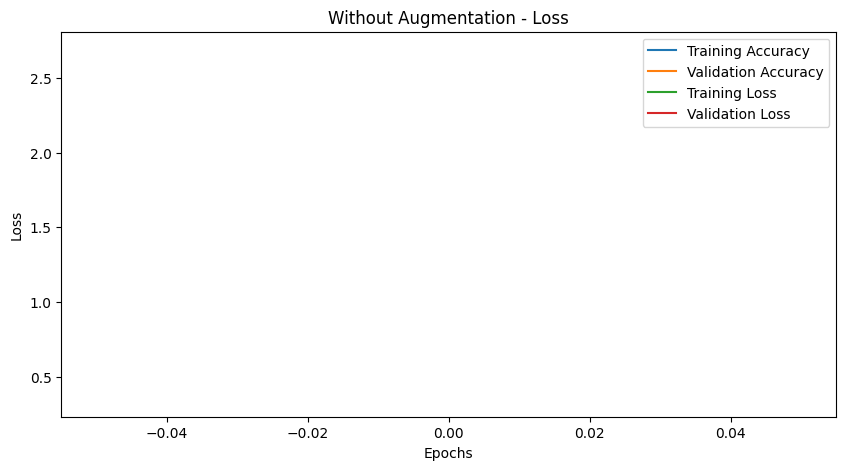

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Without Augmentation - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Without Augmentation - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

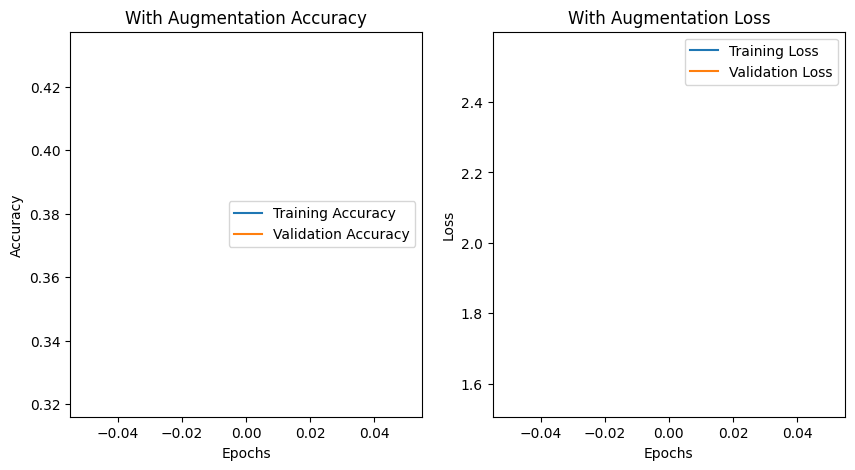

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(historyAug.history['accuracy'], label='Training Accuracy')
plt.plot(historyAug.history['val_accuracy'], label='Validation Accuracy')
plt.title('With Augmentation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(historyAug.history['loss'], label='Training Loss')
plt.plot(historyAug.history['val_loss'], label='Validation Loss')
plt.title('With Augmentation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
y_pred = tf.argmax(model.predict(x_test), axis=-1)
y_true = tf.argmax(y_test, axis=-1)
conf_Mat = confusion_matrix(y_true, y_pred)
print("Confusion Matrix - Augmentation:\n", conf_Mat)

313/313 [==============================] - 8s 26ms/step
Confusion Matrix - Augmentation:
 [[505  37 101  29  83  10  65  23 111  36]
 [ 53 537  20  28  28  34  79  25  59 137]
 [ 60  19 204  78 308  60 191  47  24   9]
 [ 12  17  82 194 188 139 279  52   9  28]
 [ 34  11  63  39 551  38 159  83  15   7]
 [  6  14 122 157 200 230 163  90  11   7]
 [  4   9  44  44 237  25 583  36   2  16]
 [ 17  17  35  70 242  61  76 438  11  33]
 [211  46  47  63  54  18  84  10 426  41]
 [ 67 148  15  48  31  27 110  36  51 467]]


In [ ]:
y_pred_aug = tf.argmax(modelAug.predict(x_test), axis=-1)
y_true_aug = tf.argmax(y_test, axis=-1)
conf_MatAug = confusion_matrix(y_true_aug, y_pred_aug)
print("Confusion Matrix - Augmentation:\n", conf_MatAug)

313/313 [==============================] - 7s 22ms/step
Confusion Matrix - Augmentation:
 [[402 107  36  41  13  23  22  48 172 136]
 [  9 675   4  17   2   4  15   9  17 248]
 [ 83  35 188  94  91 130 174 139  30  36]
 [ 20  62  30 287  28 190 180 117  12  74]
 [ 39  26  76  58 205  81 230 210  17  58]
 [ 16  25  33 202  38 368 116 158   9  35]
 [  4  36  27  88  29  56 597  78   4  81]
 [  9  40   7  88  32  89  50 604   6  75]
 [109 198   9  17   1  18  11  13 478 146]
 [ 22 375   3  12   2   9  14  30  19 514]]


313/313 [==============================] - 7s 24ms/step
Correctly classified images for model without augmentation:


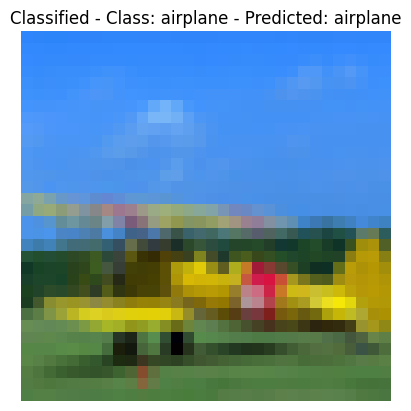

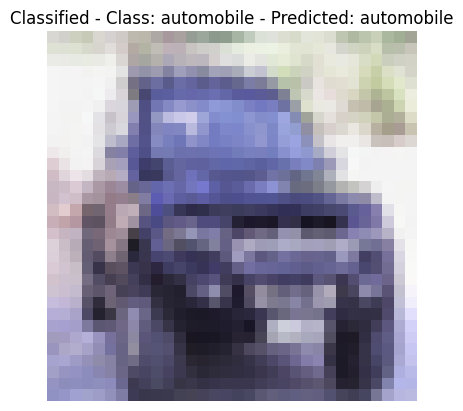

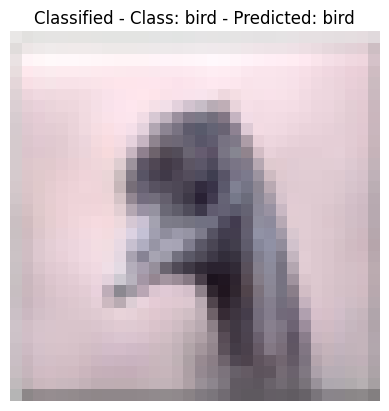

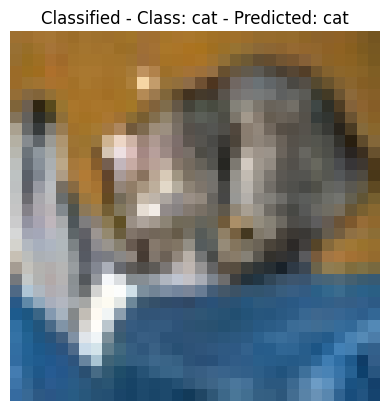

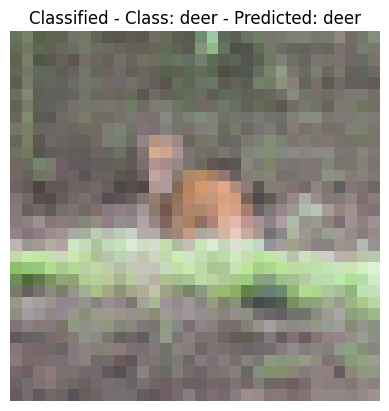

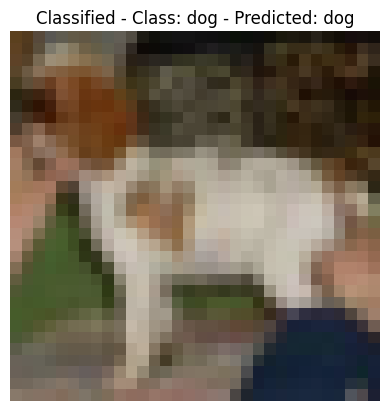

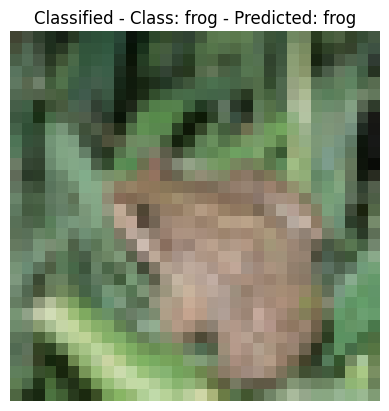

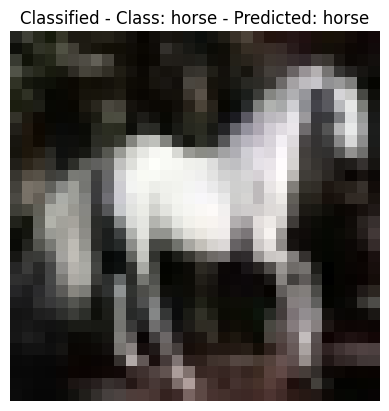

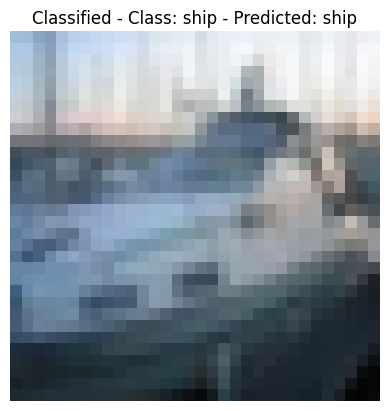

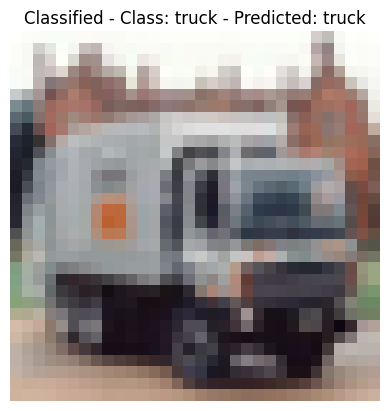

Incorrectly classified images for model without augmentation:


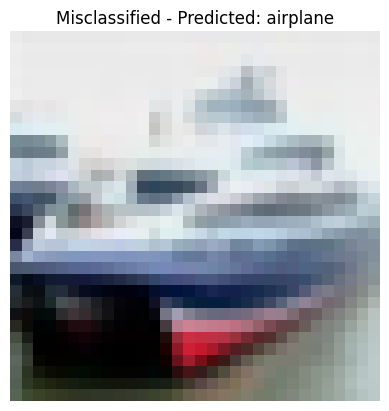

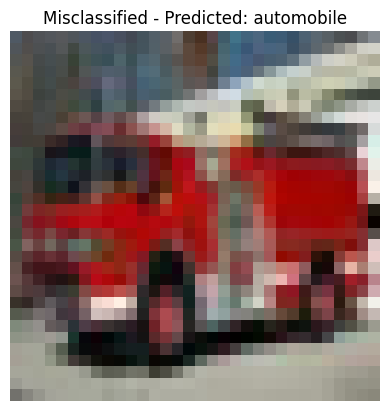

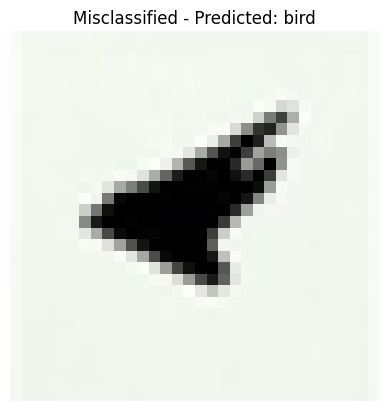

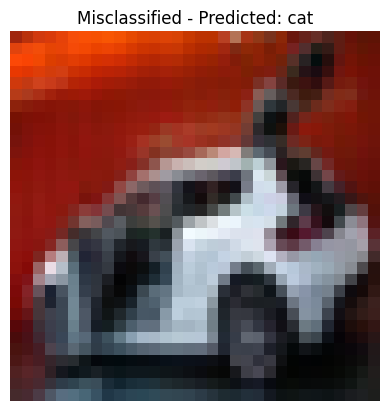

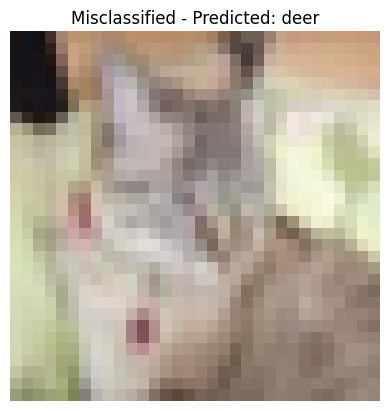

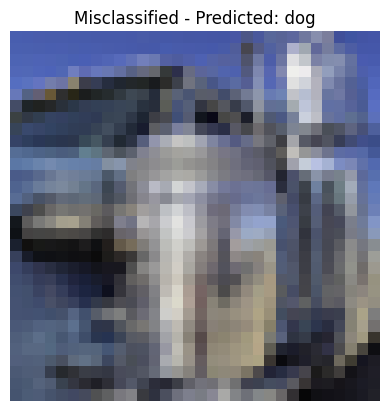

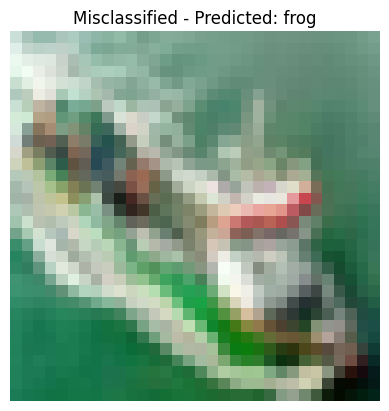

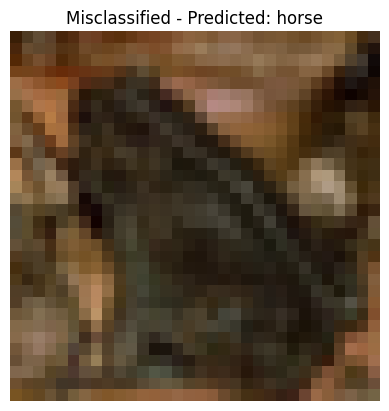

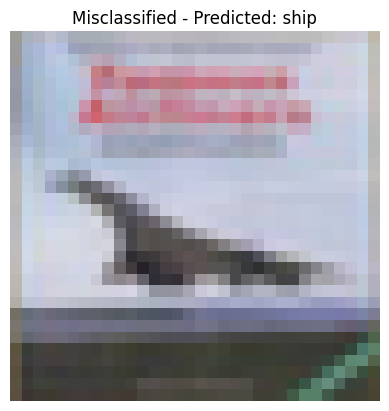

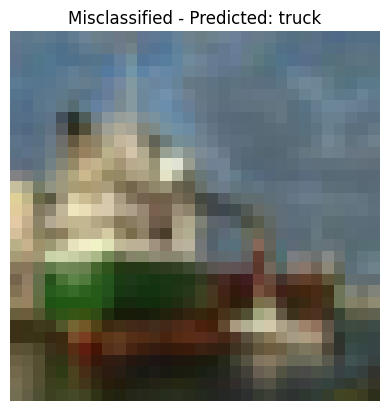

313/313 [==============================] - 9s 27ms/step
Correctly classified images for model with augmentation:


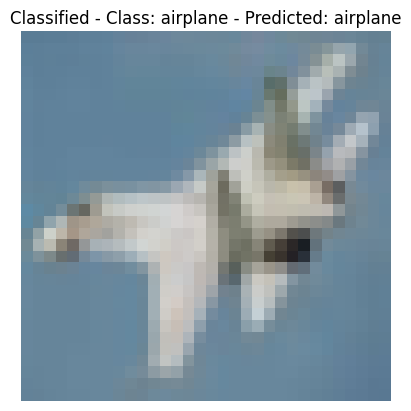

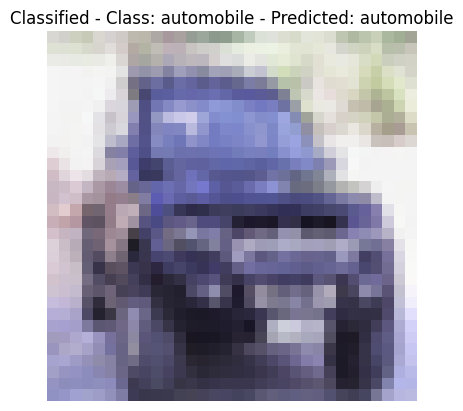

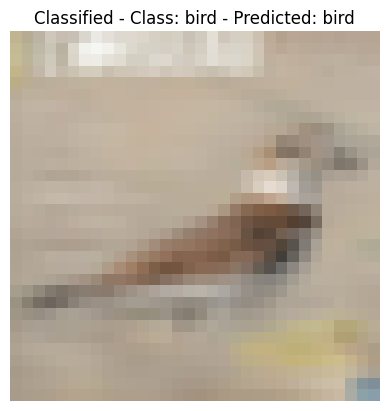

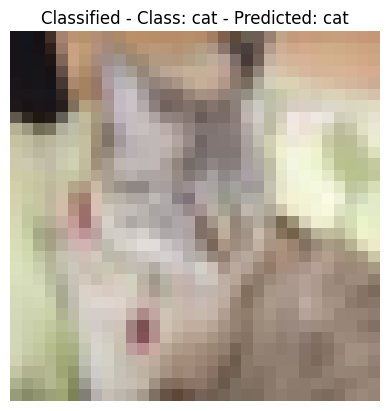

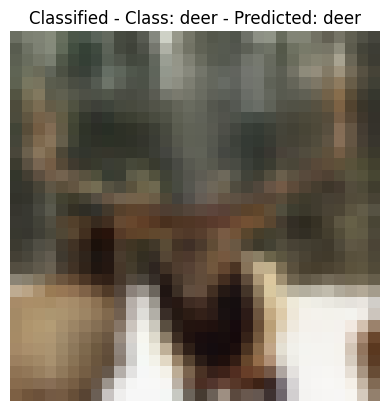

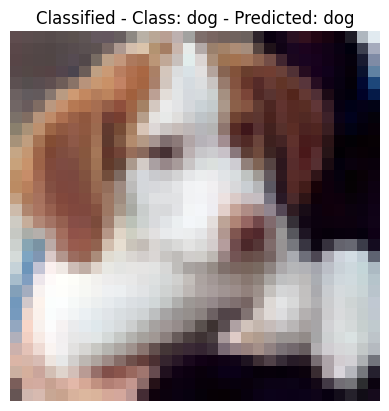

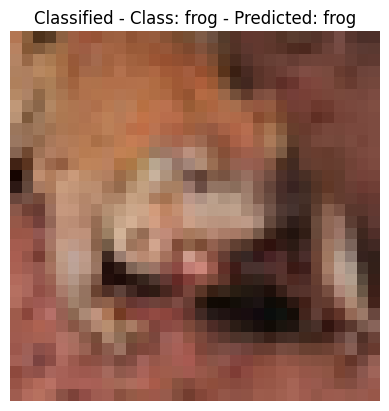

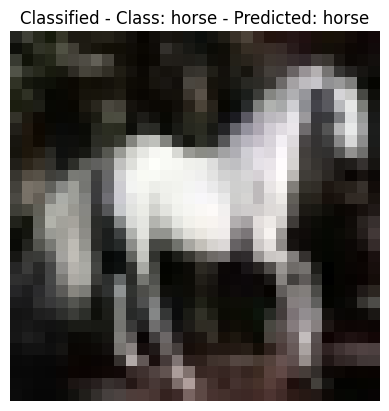

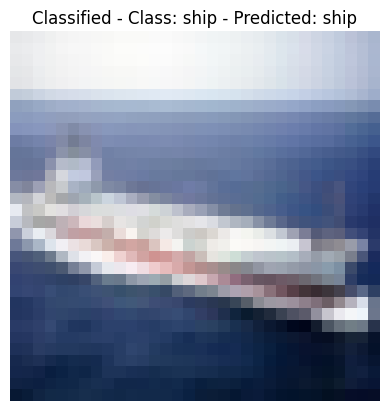

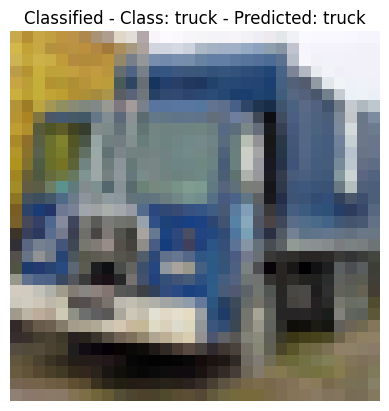

Incorrectly classified images for model with augmentation:


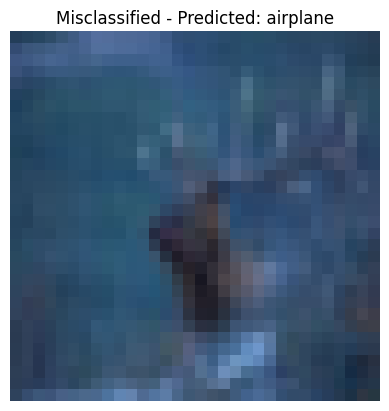

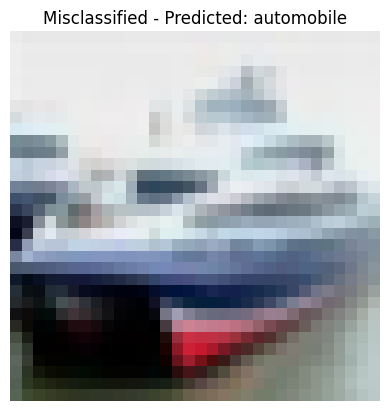

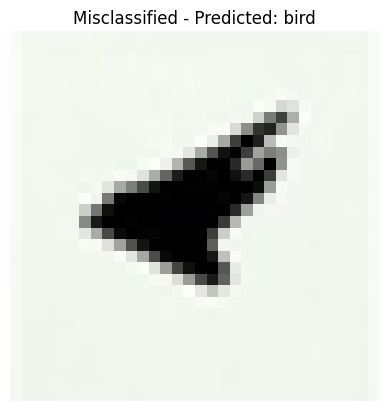

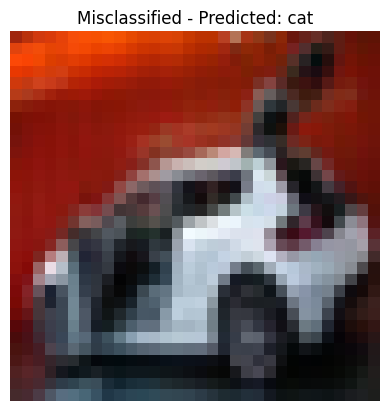

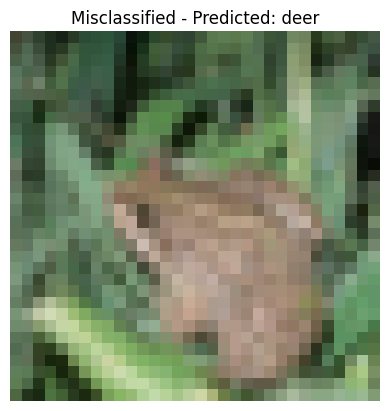

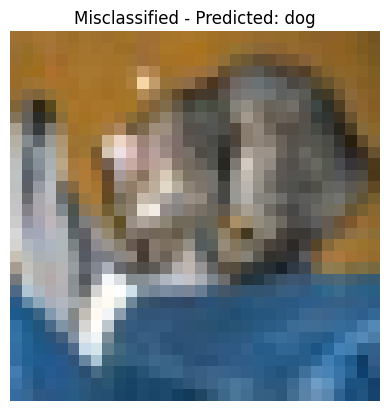

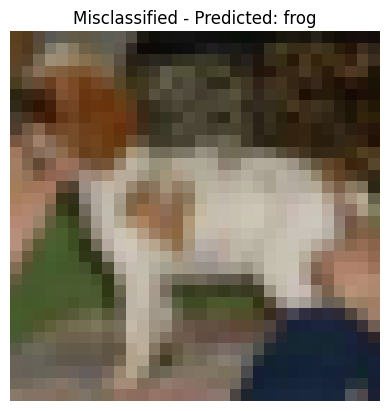

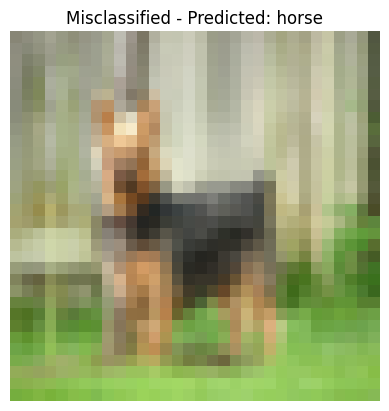

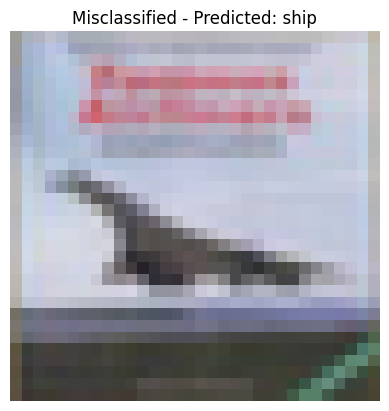

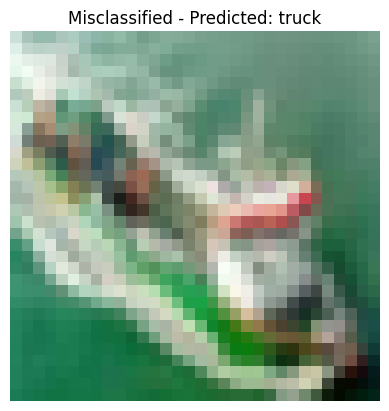

In [ ]:
class_names = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}
#image plotting code reused from previous assignment
def plotImages(model, x_test, y_test, modelType, correct=True):
    y_pred = tf.argmax(model.predict(x_test), axis=-1)
    y_true = tf.argmax(y_test, axis=-1)

    corr_imgs = {new_list: [] for new_list in range(0, 10)}
    incorr_imgs = {new_list: [] for new_list in range(0, 10)}

    for i in range(len(x_test)):
        predVal_int = y_pred[i].numpy()
        trueVal_int = y_true[i].numpy()

        if predVal_int == trueVal_int:
            if len(corr_imgs[trueVal_int]) < 1:
                corr_imgs[trueVal_int].append((x_test[i], predVal_int))
        else:
            if len(incorr_imgs[predVal_int]) < 1:
                incorr_imgs[predVal_int].append((x_test[i], predVal_int))

    print(f"Correctly classified images for {modelType}:")
    for i in range(10):
        for j in range(len(corr_imgs[i])):
            img, pred = corr_imgs[i][j]
            plt.imshow(tf.squeeze(img))
            plt.title(f"Classified - Class: {class_names[i]} - Predicted: {class_names[pred]}")
            plt.axis('off')
            plt.show()

    print(f"Incorrectly classified images for {modelType}:")
    for i in range(10):
        for j in range(len(incorr_imgs[i])):
            img, pred = incorr_imgs[i][j]
            plt.imshow(tf.squeeze(img))
            plt.title(f"Misclassified - Predicted: {class_names[pred]}")
            plt.axis('off')
            plt.show()

plotImages(model, x_test, y_test, "model without augmentation", correct=True)
plotImages(modelAug, x_test, y_test, "model with augmentation", correct=True)


**Task 3:**
 Build a vision transformer from scratch and train this network to classify CIFAR-10 and CIFAR-100 images. Report your understanding of the several techniques involved. What performance do you get in comparison with the reported performances? Useful links: https://github.com/tensorflow/models/blob/master/official/vision/MODEL_GARDEN.md



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
#CIFAR-10 dataset
(x_train10, y_train10), (x_test10, y_test10) = tf.keras.datasets.cifar10.load_data()

#CIFAR-100 dataset
(x_train100, y_train100), (x_test100, y_test100) = tf.keras.datasets.cifar100.load_data()

In [ ]:
X_train10 = tf.floor(tf.constant(x_train10, dtype = tf.float32)/255)
Y_train10 = tf.constant(y_train10, dtype = tf.int32)
X_test10 = tf.floor(tf.constant(x_test10, dtype = tf.float32)/255)
Y_test10 = tf.constant(y_test10, dtype = tf.int32)

X_train100 = tf.floor(tf.constant(x_train100, dtype = tf.float32)/255)
Y_train100 = tf.constant(y_train100, dtype = tf.int32)
X_test100 = tf.floor(tf.constant(x_test100, dtype = tf.float32)/255)
Y_test100 = tf.constant(y_test100, dtype = tf.int32)

In [ ]:
Y_train10, Y_test10 = keras.utils.to_categorical(Y_train10), keras.utils.to_categorical(Y_test10)
Y_train100, Y_test100 = keras.utils.to_categorical(Y_train100), keras.utils.to_categorical(Y_test100)

In [ ]:
#Reference: https://keras.io/examples/vision/image_classification_with_vision_transformer/
def create_vit(num_classes, patch_size, num_layers, hidden_size, num_heads, mlp_size, input_shape=(32, 32, 3)):
    data_augmentation = keras.Sequential(
        [
            layers.experimental.preprocessing.RandomFlip("horizontal"),
            layers.experimental.preprocessing.RandomRotation(0.02),
            layers.experimental.preprocessing.RandomZoom(0.2),
        ]
    )
    
    inputs = keras.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    
    patch_height = patch_size[0]
    patch_width = patch_size[1]
    num_channels = augmented.shape[-1]
    x = layers.Reshape((-1, patch_height * patch_width * num_channels))(augmented)
    x = layers.Dense(hidden_size)(x)
    
    num_patches = (augmented.shape[1] // patch_height) * (augmented.shape[2] // patch_width)
    pos_emb = layers.Embedding(input_dim=num_patches, output_dim=hidden_size)(tf.range(num_patches))
    x = pos_emb + x
    
    for _ in range(num_layers):
        y = x  #save for residual connection
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=hidden_size // num_heads, dropout=0.1)(x, x)
        x = layers.LayerNormalization(epsilon=1e-6)(x + y + pos_emb)  #add residual connection
        y = layers.Dense(mlp_size, activation="relu")(x)
        y = layers.Dense(hidden_size)(y)
        x = layers.LayerNormalization(epsilon=1e-6)(x + y)
        
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.5)(x)
    
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

vit10 = create_vit(num_classes=10, patch_size=(8, 8), num_layers=6, hidden_size=256, num_heads=8, mlp_size=512)

vit100 = create_vit(num_classes=100, patch_size=(8, 8), num_layers=6, hidden_size=256, num_heads=8, mlp_size=512)


In [ ]:
vit10.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history_vit10 = vit10.fit(X_train10, Y_train10, epochs=3, validation_data=(X_test10, Y_test10), batch_size=64)

vit100.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])
history_vit100 = vit100.fit(X_train100, Y_train100, epochs=3, validation_data=(X_test100, Y_test100), batch_size=64)

Epoch 1/3
782/782 [==============================] - 510s 634ms/step - loss: 2.4012 - accuracy: 0.1199 - val_loss: 2.2683 - val_accuracy: 0.1379
Epoch 2/3
782/782 [==============================] - 490s 627ms/step - loss: 2.2888 - accuracy: 0.1274 - val_loss: 2.2874 - val_accuracy: 0.1283
Epoch 3/3
782/782 [==============================] - 505s 646ms/step - loss: 2.2832 - accuracy: 0.1298 - val_loss: 2.2711 - val_accuracy: 0.1374
Epoch 1/3
782/782 [==============================] - 514s 639ms/step - loss: 4.7948 - accuracy: 0.0112 - val_loss: 4.6199 - val_accuracy: 0.0100
Epoch 2/3
184/782 [======>.......................] - ETA: 5:40 - loss: 4.6362 - accuracy: 0.0108

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_vit10.history['accuracy'], label='Training Accuracy')
plt.plot(history_vit10.history['val_accuracy'], label='Validation Accuracy')
plt.title('VIT 1O - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_vit10.history['loss'], label='Training Loss')
plt.plot(history_vit10.history['val_loss'], label='Validation Loss')
plt.title('VIT 10 - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history_vit100.history['accuracy'], label='Training Accuracy')
plt.plot(history_vit100.history['val_accuracy'], label='Validation Accuracy')
plt.title('VIT 100 - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history_vit100.history['loss'], label='Training Loss')
plt.plot(history_vit100.history['val_loss'], label='Validation Loss')
plt.title('VIT 100 - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()